In [1]:
import tweepy
import json
import pickle
import os
import pandas as pd
import networkx as nx

from code import utils, pipelines
from code.graphs import PoliticalMultiGraph, PoliticalGraph
from code.representative import Representative

import matplotlib.pyplot as plt
%matplotlib inline

PATH = 'data/'

In [2]:
data = pd.read_csv(PATH+'politicians.csv', index_col='Screen_name')
data.head()

,Name,State,Party,Twitter
Screen_name,,,,
Rep. Terri A. Sewell,Terri A. Sewell,Alabama,D,@RepTerriSewell
Rep. Tom O'Halleran,Tom O’Halleran,Arizona,D,@RepOHalleran
Rep. Ann Kirkpatrick,Ann Kirkpatrick,Arizona,D,@RepKirkpatrick
Raul M. Grijalva,Raul M. Grijalva,Arizona,D,@RepRaulGrijalva
Ruben Gallego,Ruben Gallego,Arizona,D,@RepRubenGallego


In [3]:
data_groups = data.groupby('Party')

republicans = data_groups.get_group('R')
democrats = data_groups.get_group('D')

In [4]:
republican_representatives = []

for index, row in republicans.iterrows():
    republican_representatives.append(Representative(*row))

In [5]:
print(republican_representatives[0])

Republican Representative Ralph Abraham of Louisiana


In [6]:
with open('republican_likes.json', 'rb') as f:
    republican_likes = json.load(f)
    
len(republican_likes)

196

In [7]:
for rep in republican_representatives:
    rep.parse_user(PATH + 'republican_representatives/')
    rep.update_likes(republican_likes[rep.path_name])

In [8]:
for rep in republican_representatives:
    if not rep.is_parsed:
        print(rep.screen_name)

RepRobWoodall


In [9]:
subset_republican_network = PoliticalMultiGraph(republican_representatives[:50])

subset_republican_network.add_interactions('likes', color='green')
subset_republican_network.add_interactions('mentions', color='red')
subset_republican_network.add_interactions('retweets', color='blue')

subset_republican_network.get_isolated_nodes()

[]

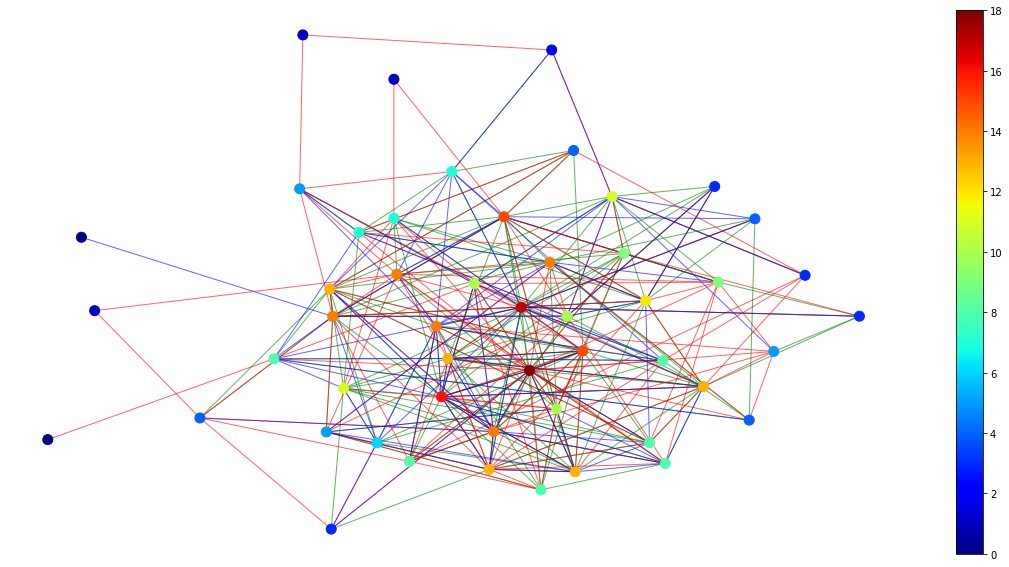

In [10]:
subset_republican_network.draw_graph(layout=nx.kamada_kawai_layout, edge_attrs={'alpha':0.6}, node_attrs={'node_size': 100}, save_fig=True, save_fig_path='small_republican_graph.png')

In [11]:
republican_network = PoliticalMultiGraph(republican_representatives)

In [12]:
republican_network.add_interactions('likes', color='green')
republican_network.add_interactions('mentions', color='red')
republican_network.add_interactions('retweets', color='blue')

In [13]:
republican_network.get_isolated_nodes()

[]

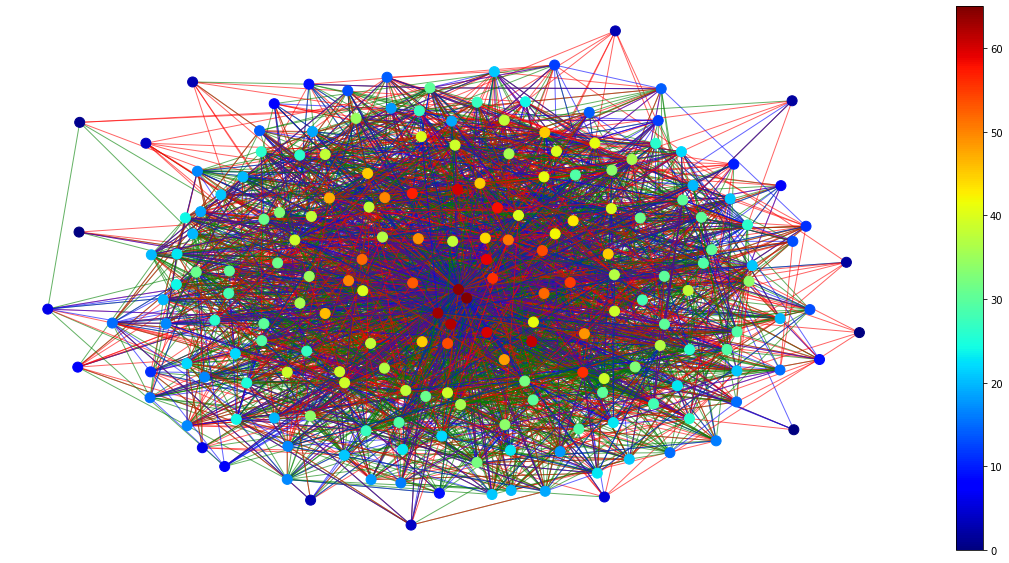

In [15]:
republican_network.draw_graph(layout=nx.kamada_kawai_layout, edge_attrs={'alpha':0.6}, node_attrs={'node_size': 100}, save_fig=True, save_fig_path='republican_graph.png')

In [16]:
print(
    nx.is_connected(republican_network.graph),
    nx.is_directed(republican_network.graph),
    nx.diameter(republican_network.graph),
)

True False 3


In [17]:
republican_corpus = utils.get_hashtag_corpus(republican_representatives)
sorted(list(republican_corpus.items()), key=lambda x: x[1], reverse=True)[:10]

[('covid19', 2307),
 ('coronavirus', 948),
 ('ppp', 505),
 ('usmca', 503),
 ('paycheckprotectionprogram', 487),
 ('ksleg', 443),
 ('ks02', 428),
 ('sotu', 380),
 ('kssen', 342),
 ('inittogether', 281)]

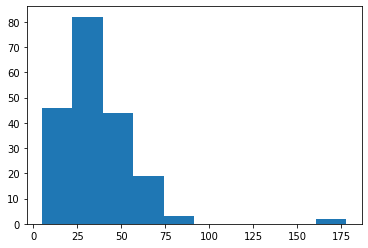

In [18]:
plt.hist(nx.get_node_attributes(republican_network.graph, 'count').values())
plt.show()

In [19]:
from pyvis.network import Network

In [21]:
rnet = PoliticalGraph(republican_representatives[:50])

In [23]:
rnet.are_representatives_parsed()

True

In [24]:
rnet.add_interactions('likes', color='green')
rnet.add_interactions('mentions', color='red')
rnet.add_interactions('retweets', color='blue')

In [25]:
rnet.get_isolated_nodes()

[]

In [28]:
visnet = Network(heading='Republican Graph', height='1100px', width='2000px')
visnet.set_edge_smooth('discrete')

In [31]:
for node in rnet.graph.nodes(data=True):
    title = f"{node[1]['name']}\n{'Republican' if node[1]['party']=='R' else 'Democrat'}\n{node[1]['state']}"
    visnet.add_node(node[0], shape="circularImage", image=node[1]['image'], title=title, size=100, label="")

In [32]:
for edge in rnet.graph.edges(data=True):
    title = f"Retweets: {edge[2]['retweets']}\nLikes: {edge[2]['likes']}\nMentions: {edge[2]['mentions']}"
    visnet.add_edge(edge[0], edge[1], title=title, width=3)

In [33]:
visnet.barnes_hut(spring_length=600)

In [34]:
visnet.write_html('testing.html')